In [1]:
import os
import sys

import pandas as pd

from Util import to_log2_tpm

In [4]:
nb_dir = '/data/parastou/RNAdeg/scripts/'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

--------------------------

In [6]:
out_dir = '/data/parastou/RNAdeg/plots'

-------------

## Load data

## Pol II RIP and pA RNA

In [7]:
df = pd.read_csv('/data/parastou/RNAdeg/results/RipRna/xp_data/merged_tpm.csv', sep='\t')

In [8]:
df = to_log2_tpm(df, shift=0)
df = df.fillna(0)

# Keep only protein coding genes
df = df[(df['category']=='repeat') | (df['type']=='gene')]

/data/parastou/RNAdeg/pyRNAdeg/Util.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_df[col] = new_df[col].apply(lambda x: log((x + shift), 2))


22 columns contained zero values. Their log-transformed results are NaNs


----------------------------

In [9]:
samples1 = ['WT', '80', '638', '301', '324', '491', '302']

In [10]:
x_labels1 = ['wt', 'clr4Δ', 'ago1Δ', 'swi6Δ', 'chp2Δ', 'mit1Δ' ,'clr3Δ']

In [11]:
samples2 = ['WT', '504', '530', '510']

In [12]:
x_labels2 = ['wt', 'rrp6Δ', 'exo2Δ', 'caf1Δ']

----

## Create Boxplots

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [14]:
from Viz import prepare_4cat_data, multi_4cat_box_plot

--------------------

# pA RNA

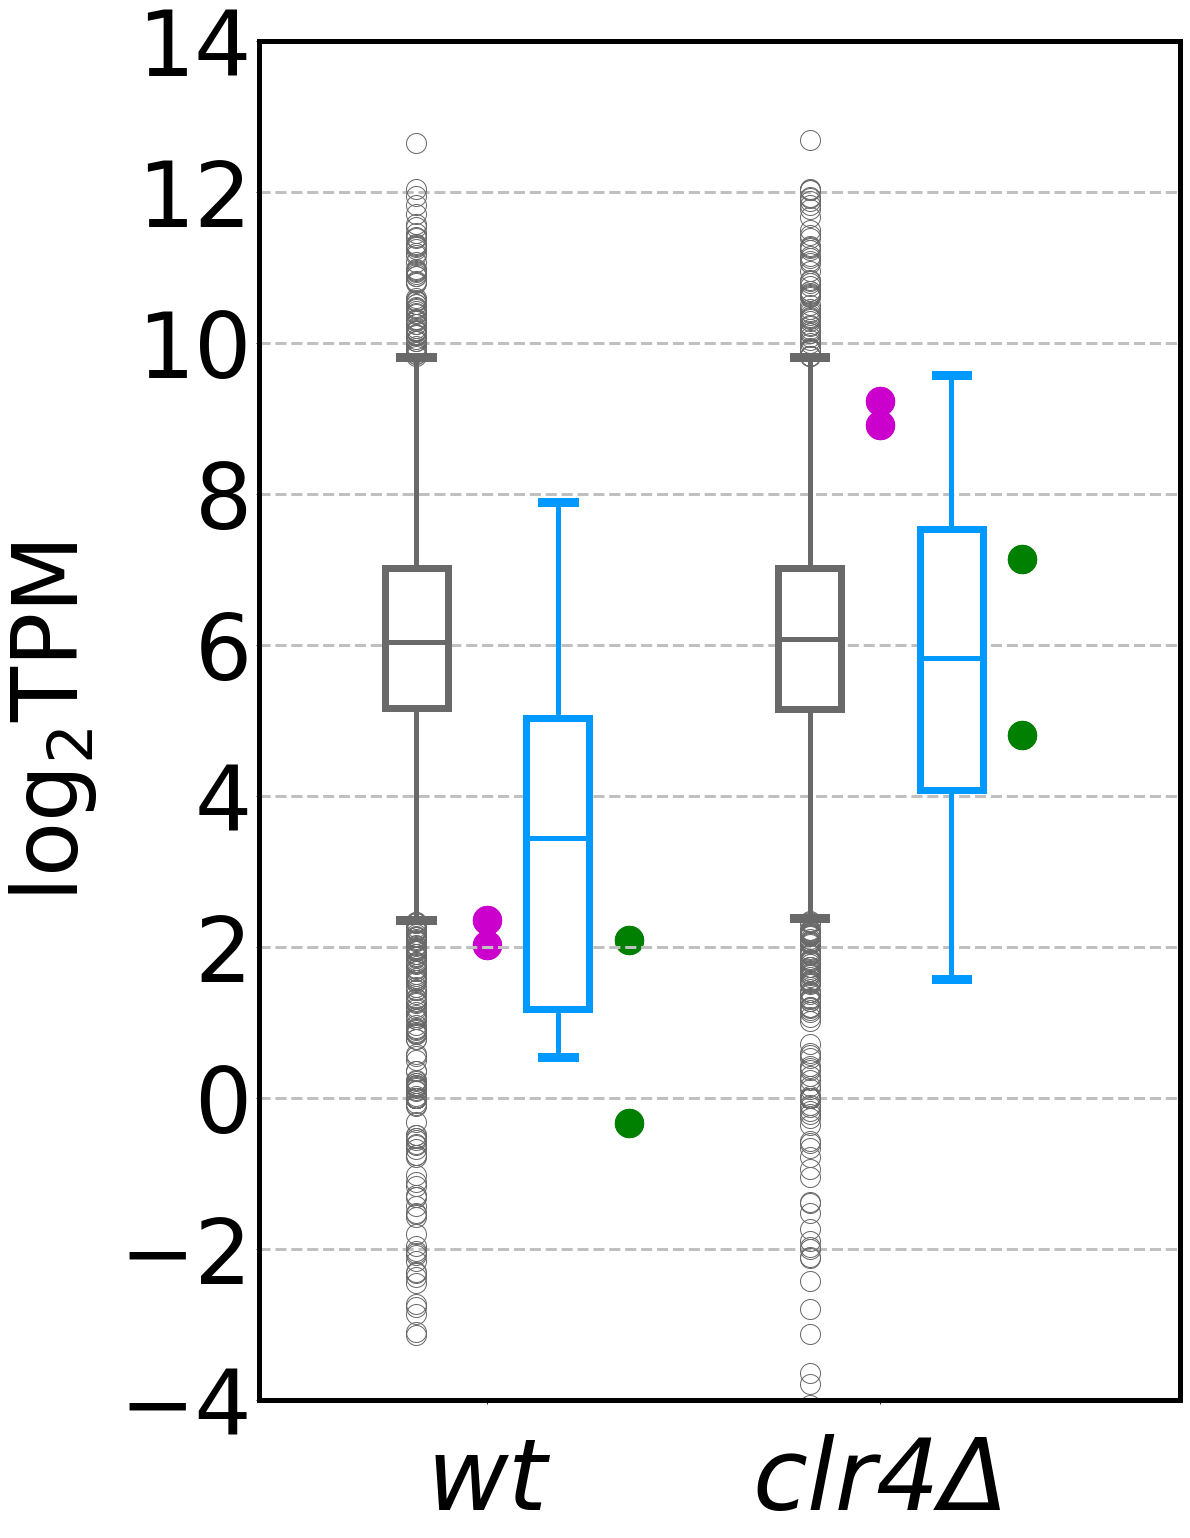

In [16]:
# data and labels
samples = [i + '_RNA' for i in ['WT', '80']]
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure-S2-B.png')
multi_4cat_box_plot(data, samples, ['wt', 'clr4Δ'], out_path, figsize=(16.5, 25), dist=5, 
                    y_label='$\mathrm{log_2TPM}$', y_lim=(-4, 14), widths=.8, xlable_size=100, ylable_size=90)

## Mutant group1

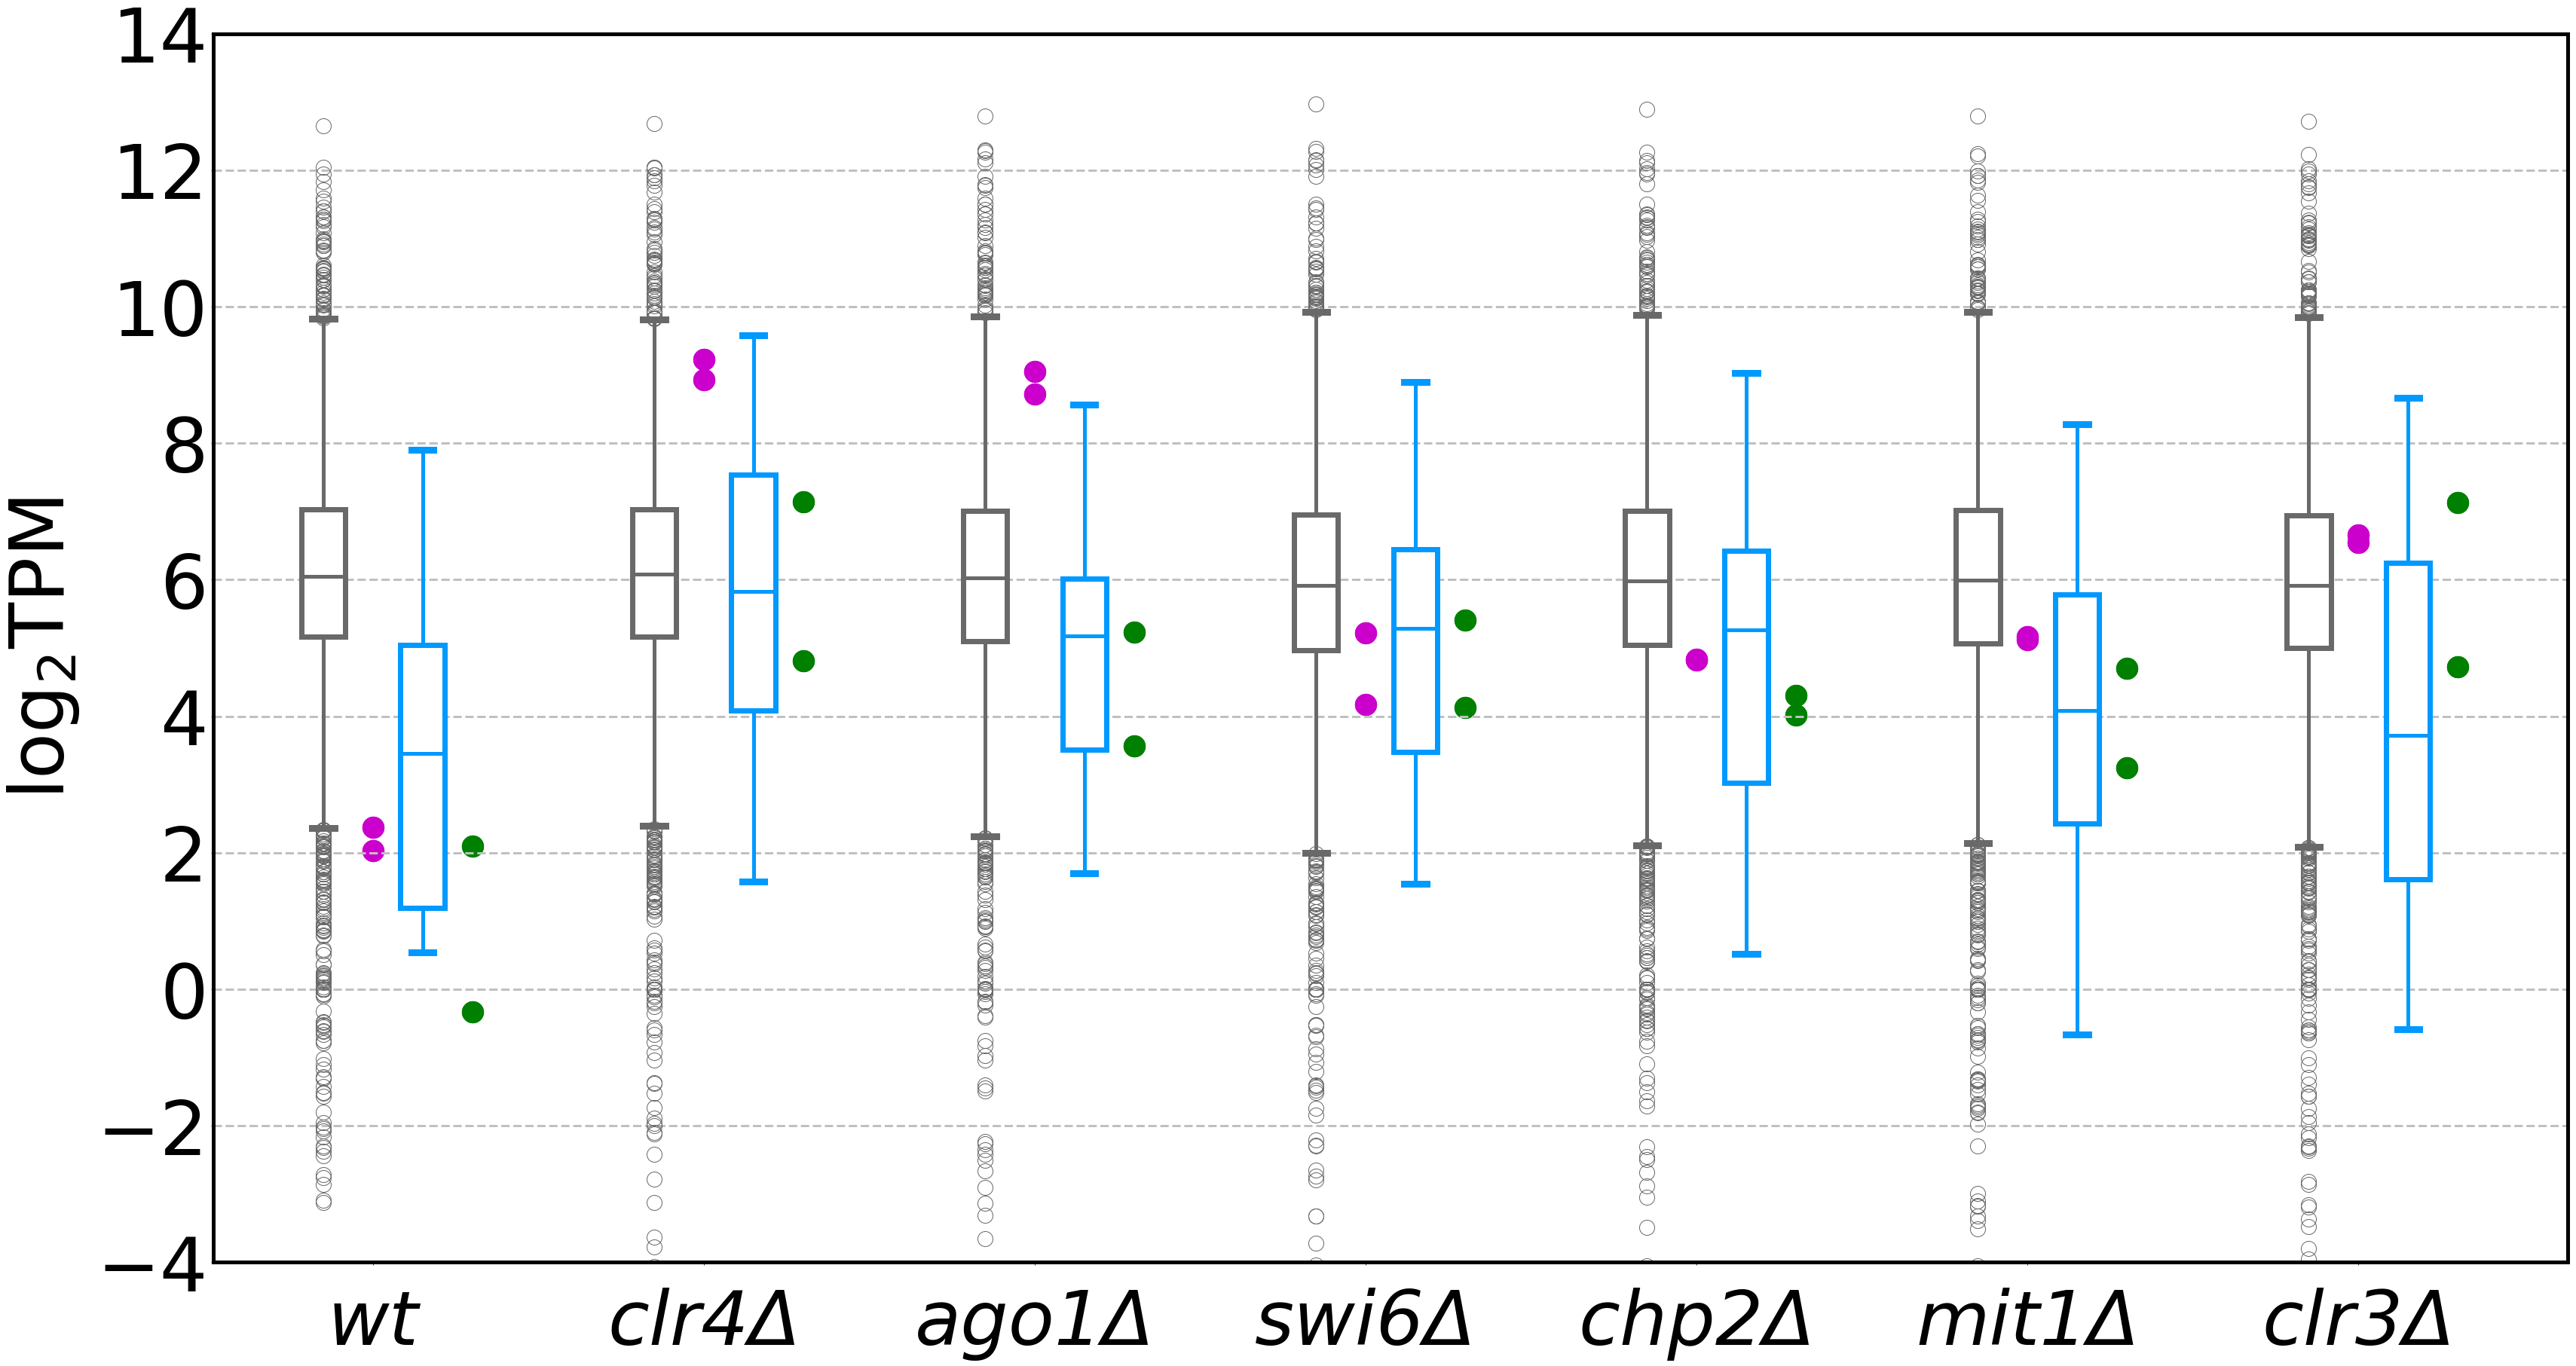

In [17]:
# data and labels
samples = [i + '_RNA' for i in samples1]
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure-S3-C.png')
multi_4cat_box_plot(data, samples, x_labels1, out_path, figsize=(56, 30), dist=6, 
                    y_label='$\mathrm{log_2TPM}$', y_lim=(-4, 14), widths=.8, xlable_size=100, ylable_size=100)

## Mutant group2

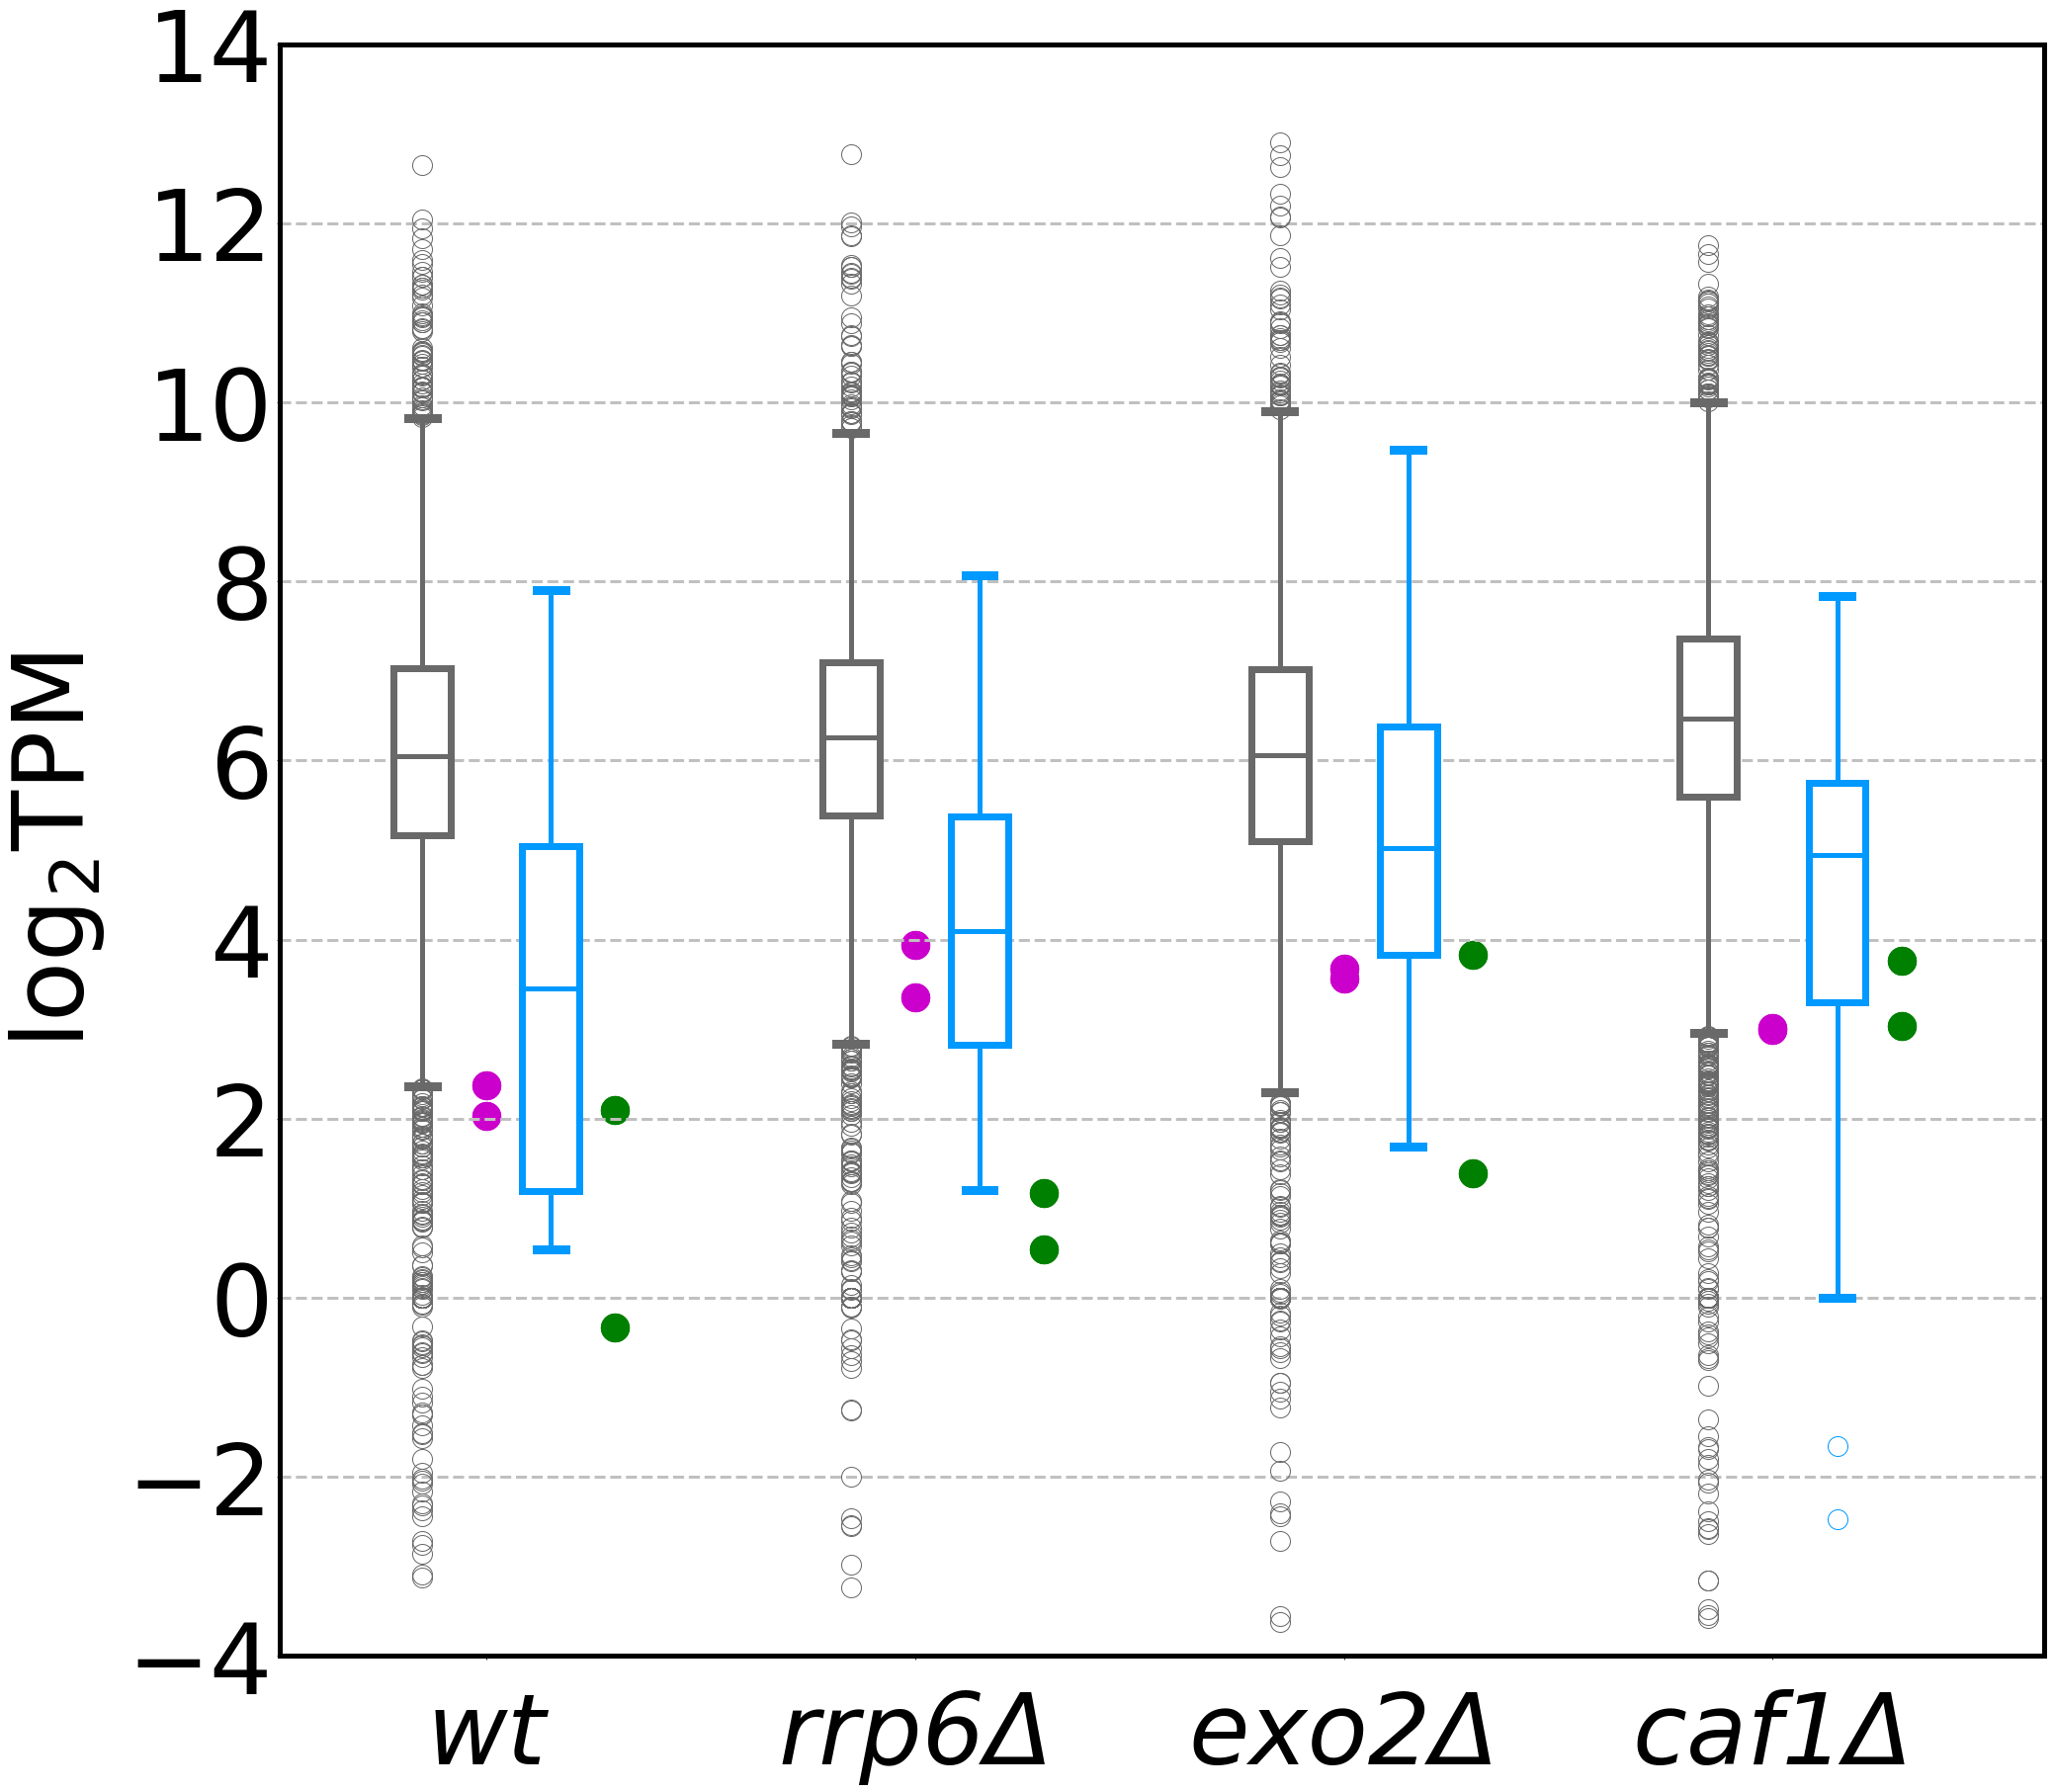

In [18]:
# data and labels
samples = [i + '_RNA' for i in samples2]
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure-S3-D.png')
multi_4cat_box_plot(data, samples, x_labels2, out_path, figsize=(32, 30), 
                    dist=6, y_label='$\mathrm{log_2TPM}$', y_lim=(-4, 14),  
                    widths=.8, xlable_size=100, ylable_size=100)

----

# Pol II RIP

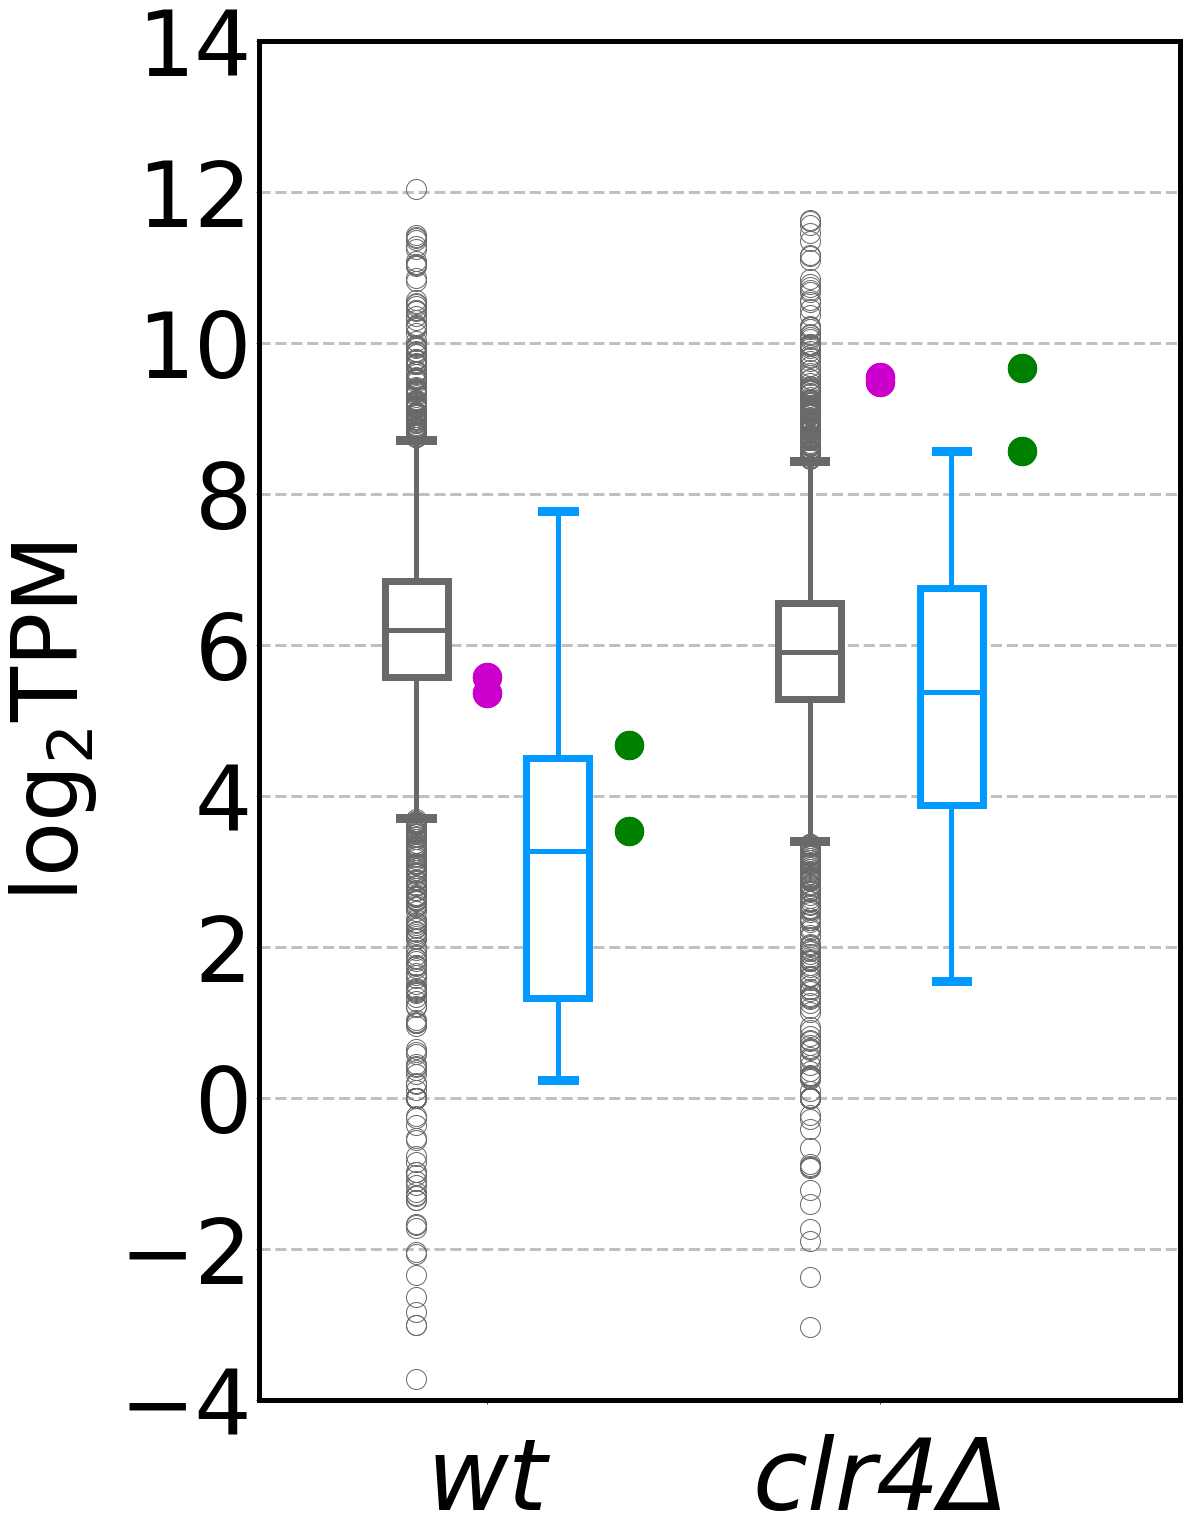

In [19]:
# data and labels
samples = [i + '_RIP' for i in ['WT', '80']]
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure-S2-A.png')
multi_4cat_box_plot(data, samples, ['wt', 'clr4Δ'], out_path, figsize=(16.5, 25), dist=5, widths=.8,
                    y_label='$\mathrm{log_2TPM}$', y_lim=(-4, 14), xlable_size=100, ylable_size=90)

## Mutant group1

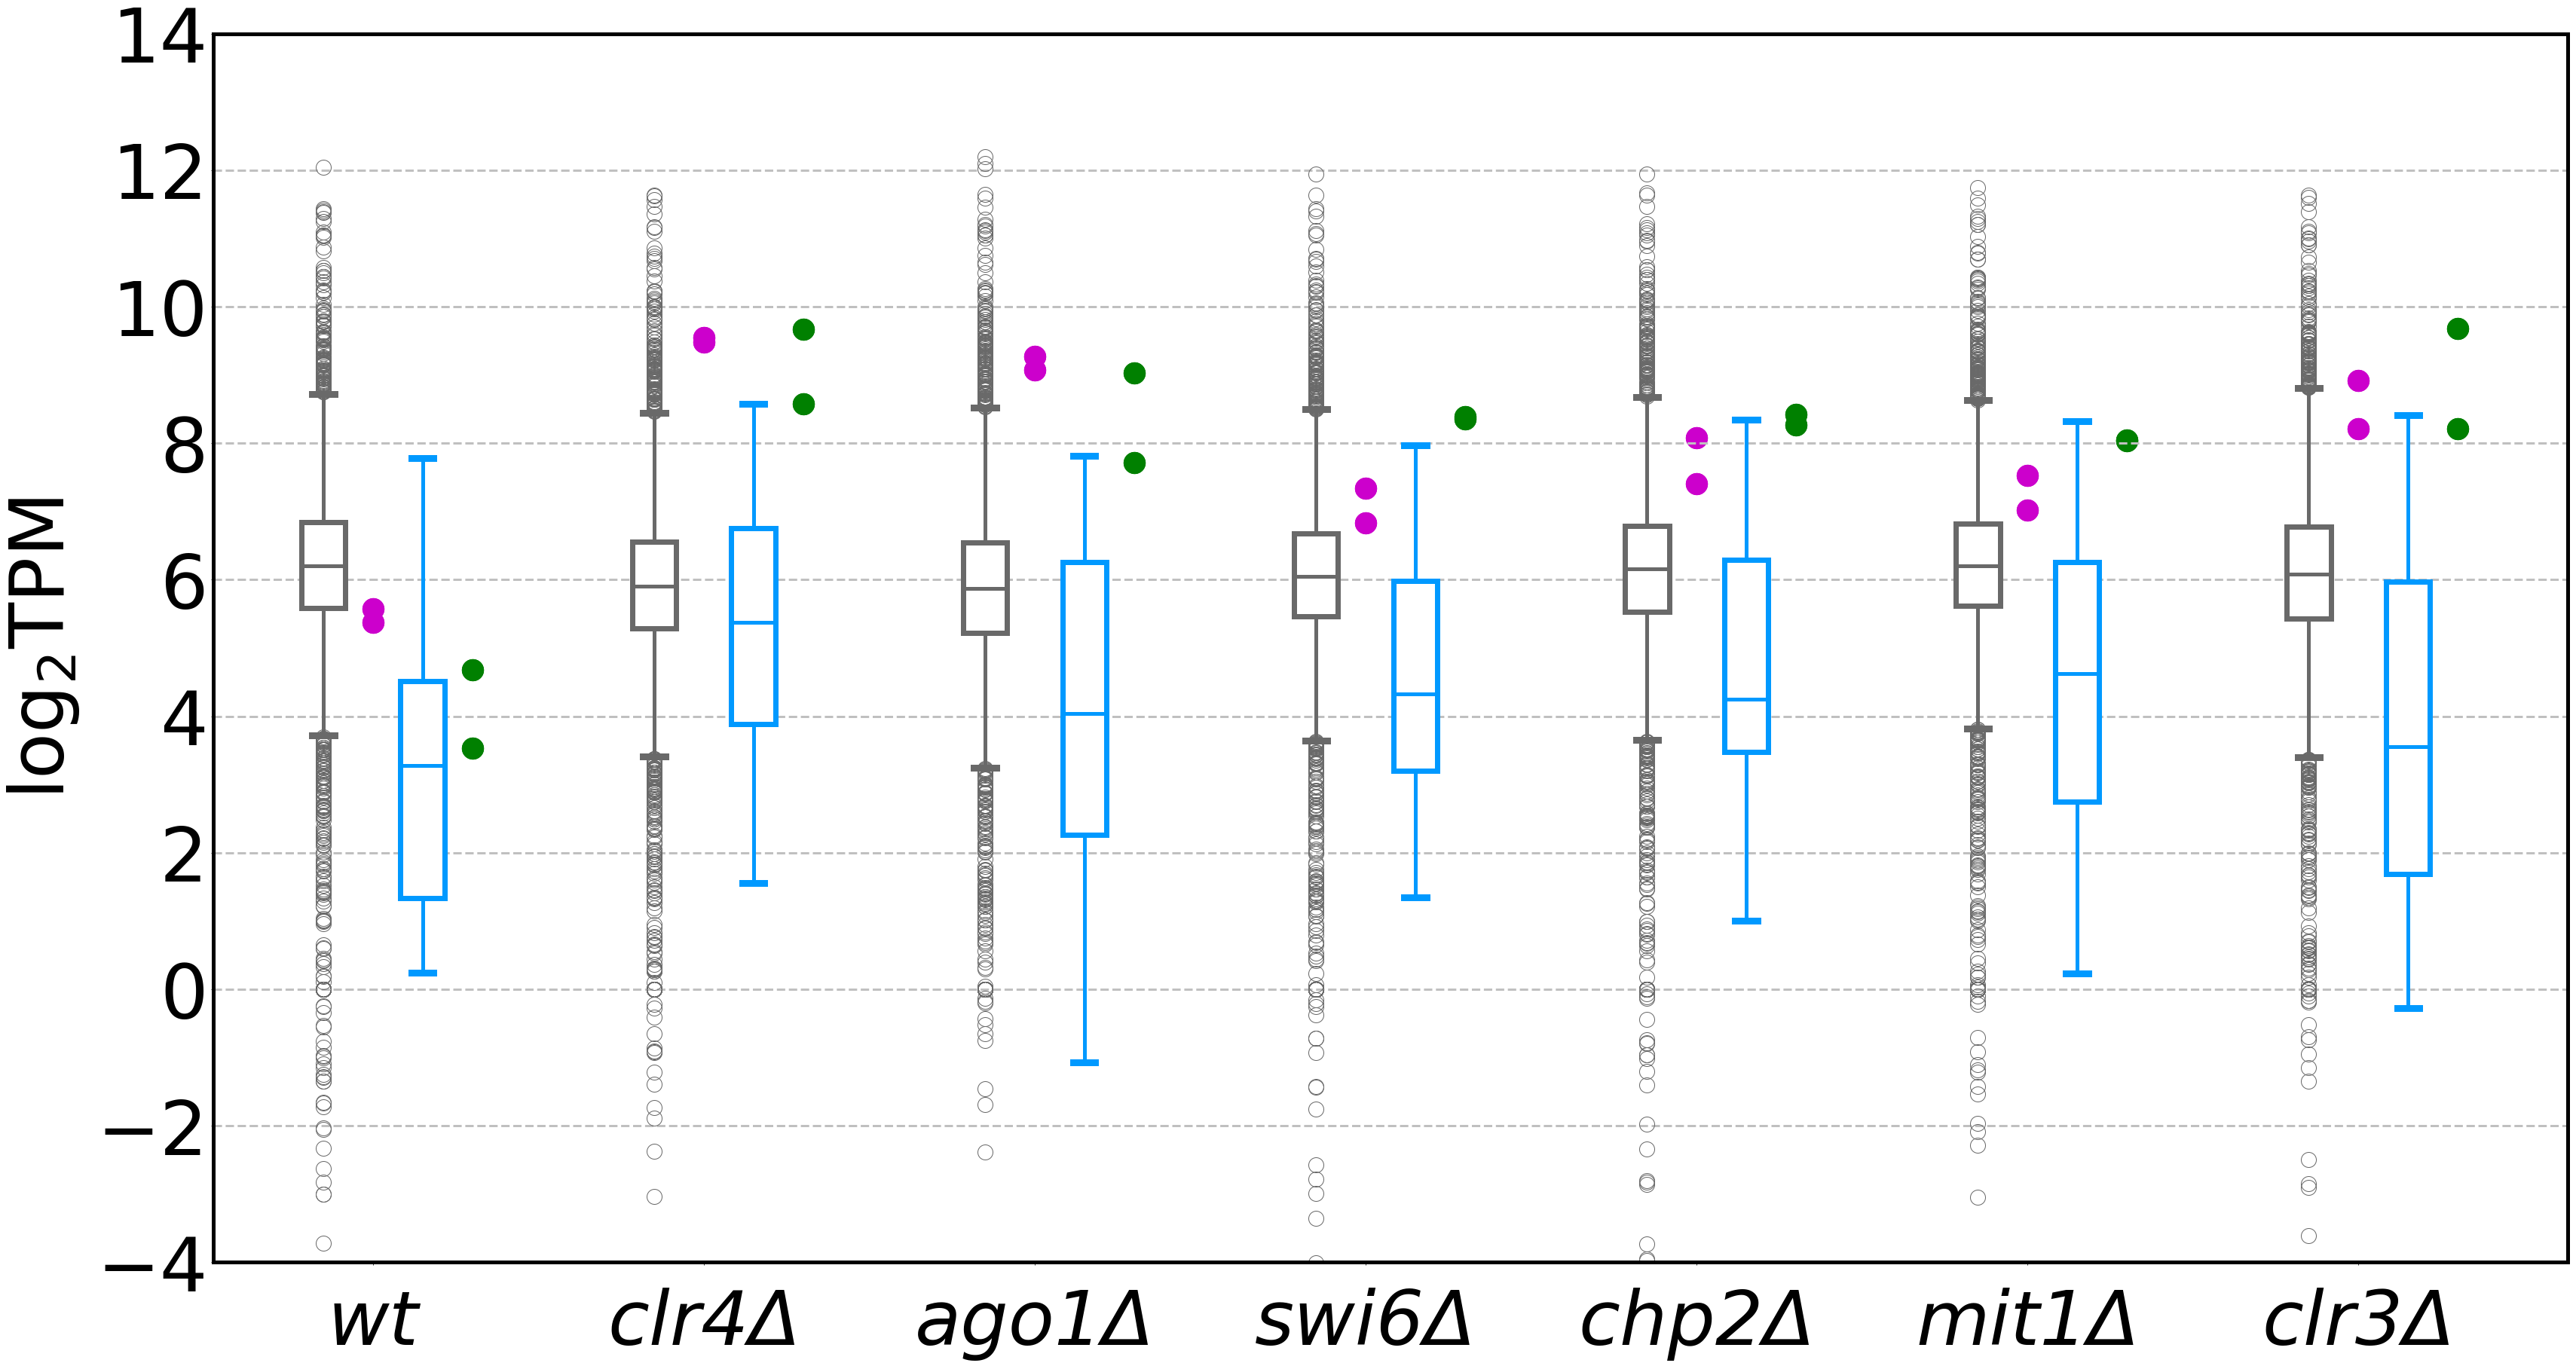

In [20]:
# data and labels
samples = [i + '_RIP' for i in samples1]
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure-S3-A.png')
multi_4cat_box_plot(data, samples, x_labels1, out_path, figsize=(56, 30), dist=6, widths=.8,
                    y_label='$\mathrm{log_2TPM}$', y_lim=(-4, 14), xlable_size=100, ylable_size=100)

## Mutant group2

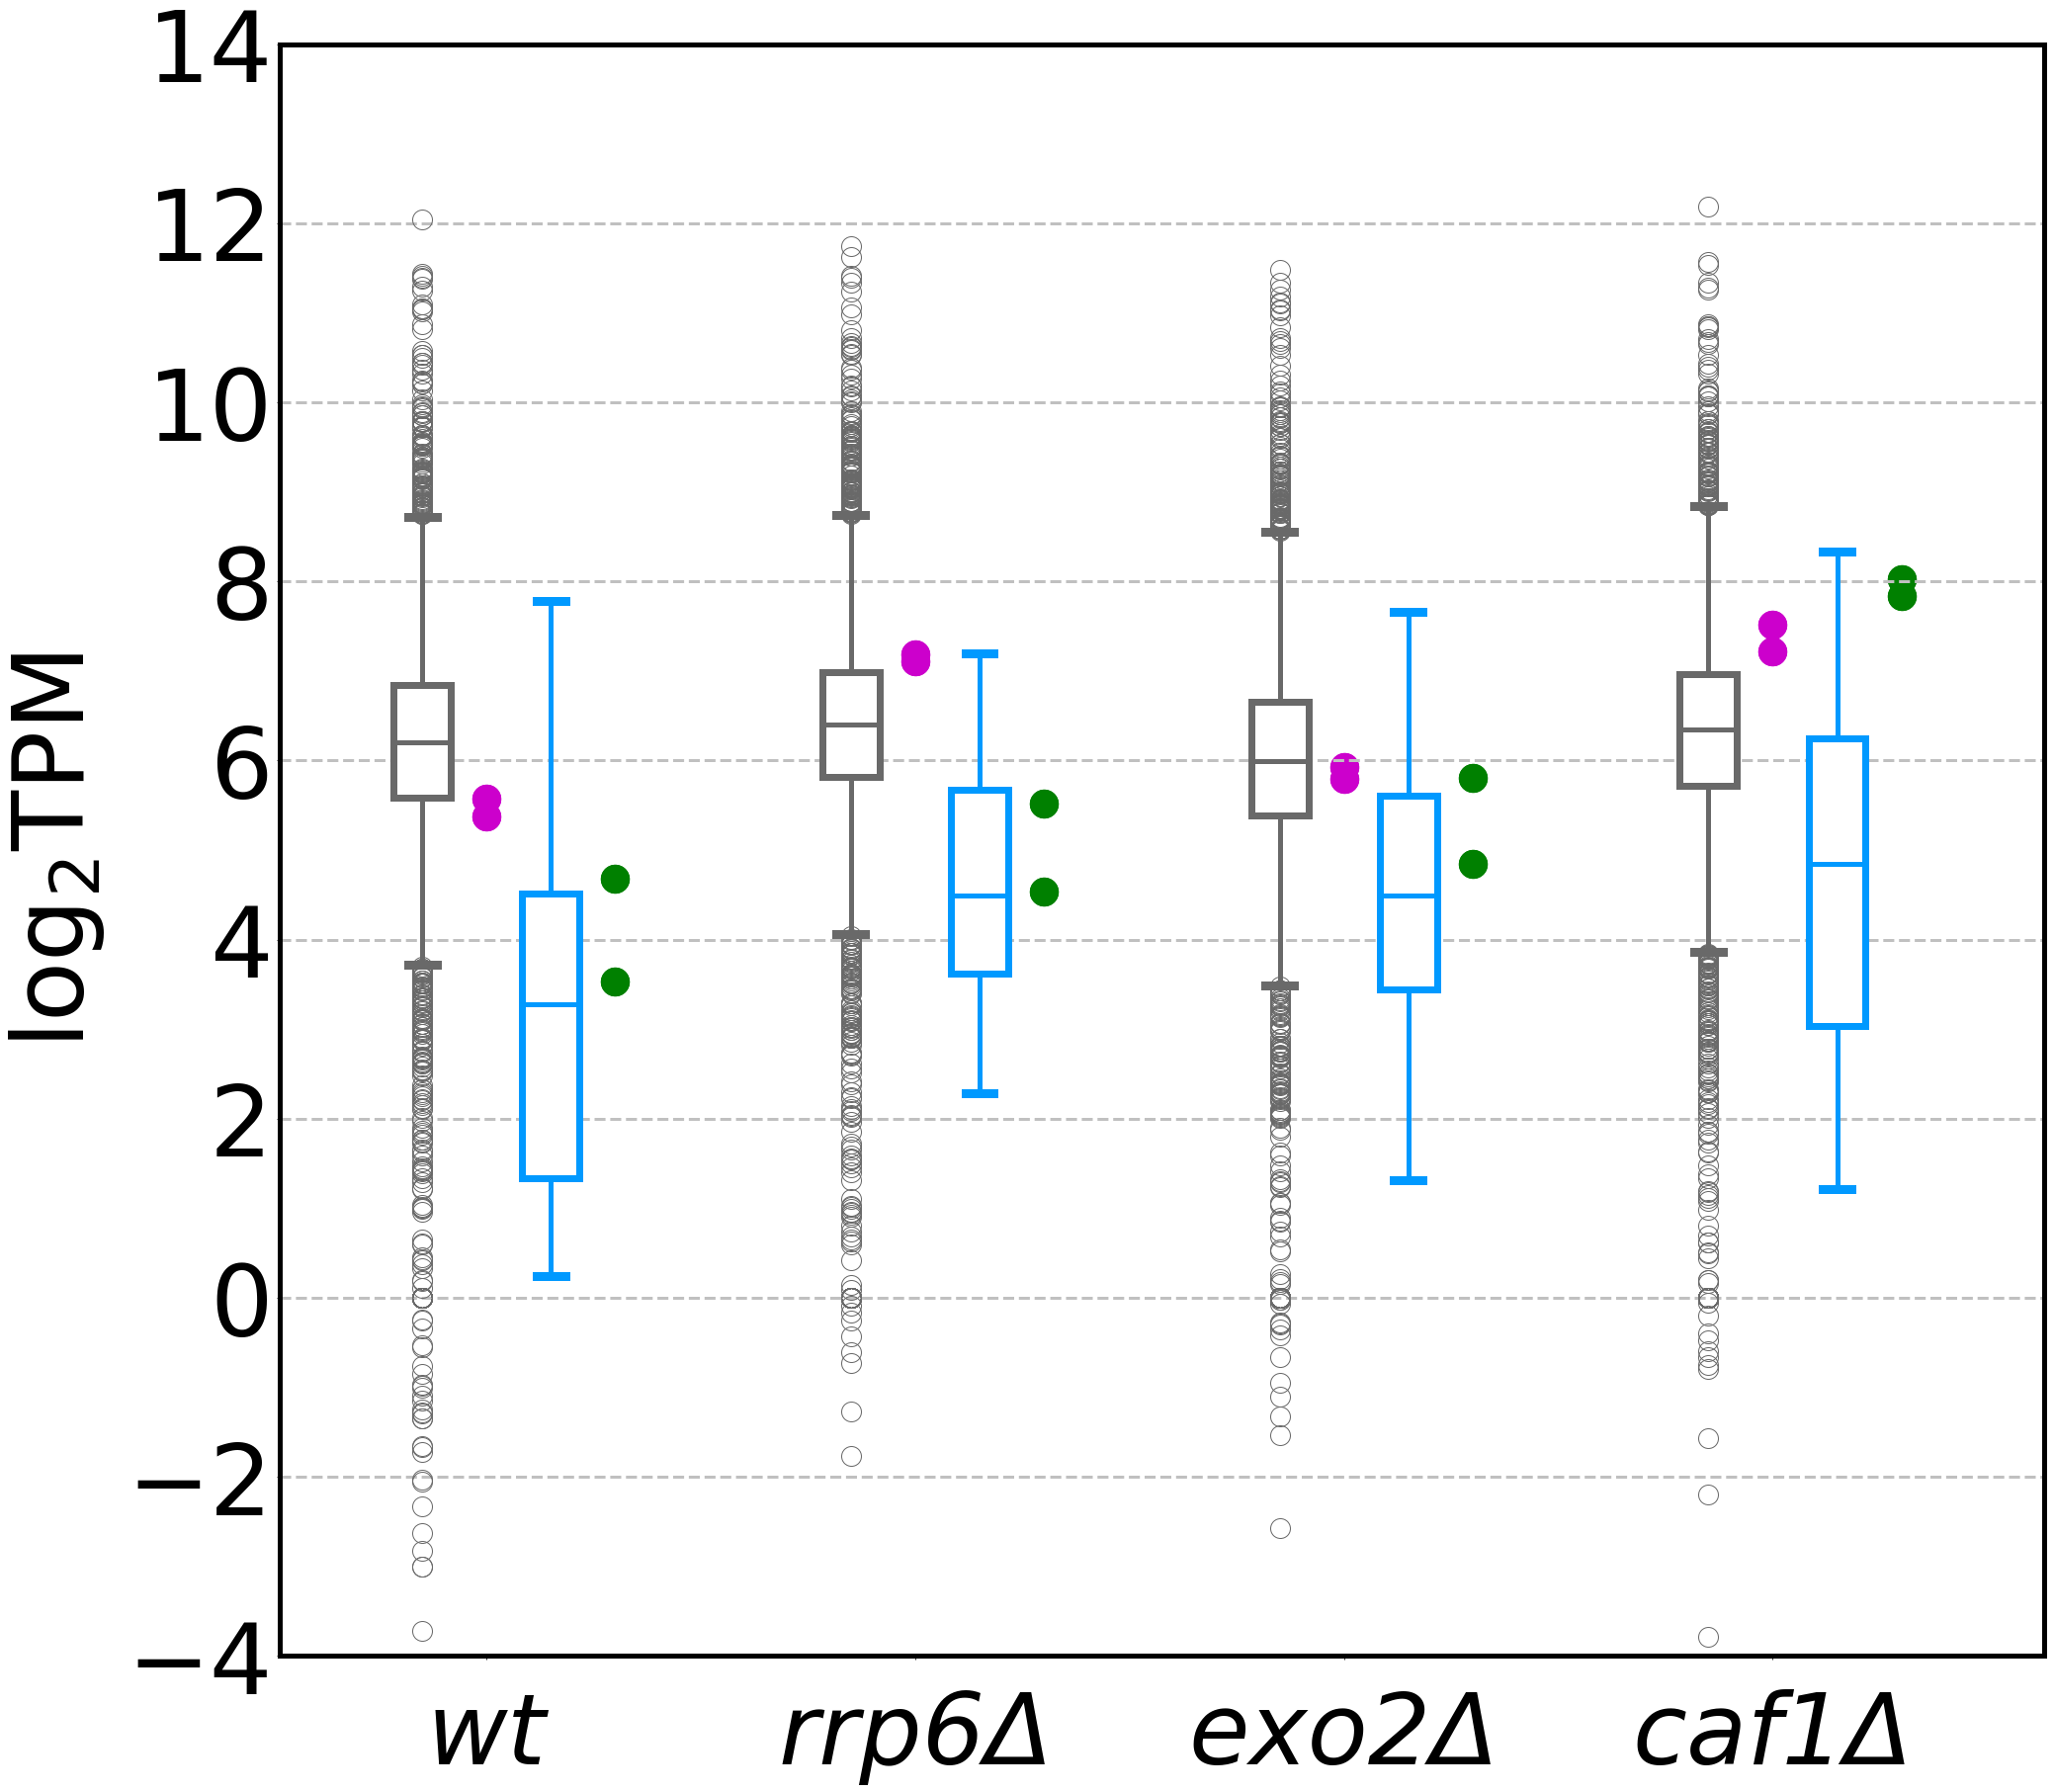

In [21]:
# data and labels
samples = [i + '_RIP' for i in samples2]
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure-S3-B.png')
multi_4cat_box_plot(data, samples, x_labels2, out_path, figsize=(32, 30), dist=6, widths=.8,
                    y_label='$\mathrm{log_2TPM}$', y_lim=(-4, 14), xlable_size=100, ylable_size=100)